# Notebook Introduction

'''
## Get started
Please, use a different browser in case you are using *MS Internet Explorer* or *MS Edge* and you experience **mulfunctions**. 

To **run** or **work** on this [jupyter notebook](https://jupyter-notebook.readthedocs.io/en/stable/notebook.html) you **must** 

1. **Save the notebook** to your Google Drive. After saving the notebook, you will be able to run it.

  * Select **File** / **Save a copy in Drive**  from the Colab menu (an example is below, the notebook name may change)
     ![Colab Menu](https://drive.google.com/uc?export=download&id=1-WfIFWuHC6OSJb3iwnR7NqpkXs9tvwO2)
  * If required, login with your google account  
  ![Signin Button](https://drive.google.com/uc?export=download&id=1yomWF3t03TiPsrp6AAZDXIFpz5XXTvM1)  (any goole account is fine, you can use the campus account or your own gmail account)
  

2.  Files are usually saved in the  **Colaboratory** *directory* which is located on the root of your google drive. 

3. To open the notebook again:
    * login to the google drive you saved the notebook: [drive.google.com](http://drive.google.com/)
    * open the **Colaboratory** directory
    * **right click** on the file. From the drop down menu choose **Open With** / **Google Colaboratory**

4. In case of problems, please refer to [this document](https://docs.google.com/document/d/1Y-ABvbOQhMvi7COibLJopL-mnPsaCBv_KRr6eKAsnj8/edit?usp=sharing)

5. By saving the first colab notebook in gdrive, it is automatically installed a **software extension** which is required to open or create new notebooks in your gdrive

## Notebooks

This is a [jupyter notebook](https://jupyter-notebook.readthedocs.io/en/stable/notebook.html) interface where several elements can be mixed e.g., 

* Cells containing programs (we will focus on the python programming language),
* Inputs and outputs of the computations,
* Explanatory text, 
* Mathematics, 
* Images,
* Rich media representations of objects
* ...

## Cell Types
We will mostly focus on two cell types:

* Code
* Text 

## Markdown
Contents in **texts cells** can be written using [markdonw syntax](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html). 

Here it is a quick reference to the markdown syntax: 

[https://en.support.wordpress.com/markdown-quick-reference/](https://en.support.wordpress.com/markdown-quick-reference/) 


## Creating an empty Colab
Please follows the next steps

* Open in a browser the URL [https://drive.google.com/](https://drive.google.com/) 

* Please choose

+ New / More / Colaboratory

* Save the notebook in your preferred gdrive location  


### COLAB Keyboard Shortcuts
To access the COLAB keyboard shortcuts:

[Menu] Tools / Keyboard Shortcuts (ctrl to be replaced by Command in the Mac)

* Ctrl+M  M     To change a cell into text
* Ctrl+M  Y      To change a cell into code
* Ctrl+M L       Toggle line numbers

'''

# Bias Variance Trade-off


## Problem Setting

We have a classifier/regressor, we have a training set. We succeeded in training it. Unfortunately, performances are not so good as expected. 

What will you do? Enlarge the training set? Use a different and more powerful classifier? ... 

Introducing a theoretical framework and some practical considerations that can help you in improving classifier performance.

## ML is about guessing Unknown Functions

A generic Machine Learning problem can be described as follow: 
* We have a set of data X and Y
* We want to identify a unknown function $f()$ so that $Y = f(X)$ 
* $f()$ is not known in advance, and we have little or no clue at all about $f()$  
* Typical ML problem: we want to infer $f()$ from the available data

Unfortunately, there are two issues.

1. Data is Noisy (even in the best scenario some noise cannot be avoided), so that the actual relation among real data is described by the next function, where $\epsilon$ represents the noise and we don't have any clue about it

\begin{align}
Y=f(X) + \epsilon
\end{align}

2. We want to learn a $f()$ that is general enough to work well on unseen data (i.e., avoiding training data overfitting) 

Trade-off

* A *simple* ML algorithm is less sensible to noise and less prone to overfitting, but it might fail to catch the right $f()$

* A complex ML algorith might well catch $f()$ but it is likely to overfit either the training data, or the noise, or both

For this reason, if you have any clue about the $f()$, the classical statistical approach might be best suited (i.e., to choose in advance $f()$ and estimate its parameters)

Unfortunately, you rarely have any clue about the $f()$, or $f()$ is too complex, therefore ML is getting popular.


## Some Examples

You want to build an algorithm to predict an house price given its size. 



<Figure size 432x288 with 0 Axes>

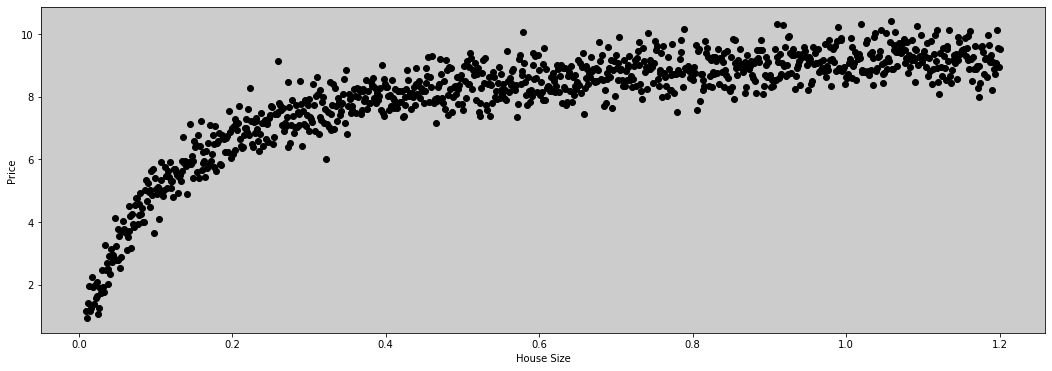

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# I set a seed, so that all random function will produce repeatable results
np.random.seed(42)

# Let's define some useful functions

# Let's assume house prices are distributed as follows w.r.t. size
def housePrice(size, err=0.5): 
  """It returns the house price given the size.
     x: House size"""
  # np.random.normal(mu, err) returns a number sampled from a distribution of 
  # mu as average and err as standard deviation
  # This is a trick to add a little bit of noise to the data
  #return 
  return np.random.normal(10 - 1. / (size + 0.1), err) # np.random.normal(mu, err)

  
# Beware: housePrice() is the function to be guessed


def compute_error(xGold, yGold, model):
  """Given a model fitted with np.polyfit() and a test set (xGold and YGold)
     it computes for each element in xGold the model prediction.
     Then, the Mean Squared Error among yGold and the model prediction is computed and returned.
     Input params:
     xGold: the x value in the test set.
     yGold: the y value in the test set.
     model: the model fitted with np.polyfit() i.e., the NumPy polyfit function
     """
  yPredicted = np.polyval(model, xGold) # I can obtain the same result using the function apply_polynomial() defined below
  return np.mean(
          (yGold - yPredicted) ** 2
          )
  #) # it computes and return the mean squared error (MSE)
  #np.sqrt() # add np.sqrt() to compute standard deviation



def getAllHouseDataAndShow(
    function=housePrice,
    xFrom=0.01,
    xTo=1.2,
    nElements = 1000,

  ):
  """It  computes the house dataset and plots the values."""
  x = np.linspace(xFrom, xTo, nElements) # Select nElements values between xFrom and xTo. It returns a vector of elements
  y = function(x) # For each element in the vector x, it computes the corresponding vector y. In our case, x is the house size vector, y is the hous price vector
  
  # resetting the figure canvas
  plt.clf()
  fig, ax = plt.subplots( # if more than one subplot is returned, axLi is an array of elements
    figsize=(18, 6) # the size of the whole picture 
    ) 
  # specifying x and y visualization bounds 
  #plt.xlim([xFrom, xTo]) 
  #plt.ylim([0, 12])
  ax.scatter(x, y, color='black')
  ax.set_facecolor('0.8') # a float value inside a string refers to a gray-scale in the [0,1] interval
  #showing the figure
  ax.set_xlabel('House Size')
  ax.set_ylabel('Price')
  plt.show()
  return x,y

xAll, yAll = getAllHouseDataAndShow()


Let's start working from few data e.g., a sample 

<Figure size 432x288 with 0 Axes>

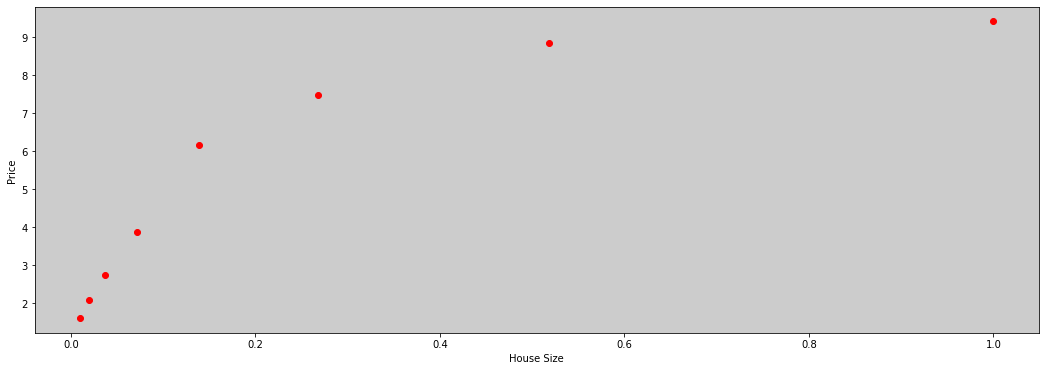

In [ ]:
def getHouseSampleAndShow(
    function=housePrice,
    xFrom=0.01,
    xTo=1.2,
  ):
  n_samples=8
  x = 10 ** np.linspace(-2, 0, n_samples) # Select N  values between -2 e 0, then it computes 10**selected_value
  y = function(x) # computing the y vector corresponding to the x vector

  plt.clf() # Clear the plotting canvas
  fig, ax = plt.subplots( # if more than one subplot is returned, axLi is an array of elements
    figsize=(18, 6) # the size of the whole picture 
    ) 

  ax.scatter(x, y, color='red')
  ax.set_facecolor('0.8') # a float value inside a string refers to a gray-scale in the [0,1] interval
  #showing the figure
  ax.set_xlabel('House Size')
  ax.set_ylabel('Price')
  plt.show() 
  return x,y,

xSample, ySample = getHouseSampleAndShow()

We’ll work using a polynomial regression. 

We will try with 3 different polynomia, respectively 

* degree 1 (this is simple linear regression)
* degree 2
* degreee 6

Let's find out which is the best fit.

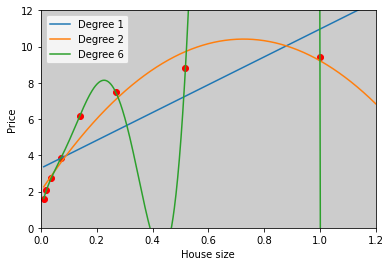

In [ ]:
def showPolyomiaFit(
    degreeLi = [1, 2, 6],
    xFrom=0.01,
    xTo=1.2,
    xSample=xSample, # it refers to the previously selected sample
    ySample=ySample # it refers to the previously selected sample
  ):

  nElements = 1000 # elements in the plotted polynomia

  plt.clf()
  #fig, ax = plt.subplots( # if more than one subplot is returned, axLi is an array of elements
  #  figsize=(18, 6) # the size of the whole picture 
  #  ) 

  # Plotting the sample points
  plt.scatter(xSample, ySample, color='red')

  # creating the x for polynomia plotting
  x = np.linspace(xFrom, xTo, nElements)

  # Plotting each polinomy
  for degree in degreeLi:  
    model = np.polyfit(xSample, ySample, degree)
    y = np.polyval(model, x)
    # plotting the (d) degree curve  
    plt.plot(x, y, label='Degree {deg}'.format(deg=degree))  

  # Setting the chart background to gray
  plt.gca().set_facecolor('0.8') # a float value inside a string refers to a gray-scale in the [0,1] interval
  
  plt.legend() # adding the legend

  plt.xlabel('House size')
  plt.ylabel('Price')

  # setting chart limits
  plt.xlim([0.0, 1.2]) 
  plt.ylim([0, 12]) # required, otherwise degree 6 will skyrocket to the high

  plt.show() # Showing the chart

  
showPolyomiaFit()


Let's find out some instruments to evaluate the two curves/polynomia.

Introducing the Mean Squared Error.

Given a set of points $(x_0,y_0), (x_1,y_1), ... (x_n,y_n)$ and a fitted function $f()$ which when applied to a $x_i$ will produce 

$\hat y_i = f(x_i) $

Then, the Mean Squared Error (MSE) is:

$MSE = \sum_{i=0}^{n} (\hat y - y)^2$

Let's compute the MSE for the three previously fitted curves

In [ ]:
tsSize = len(xSample)
print('Training Set size {tss}'.format(tss=tsSize))
for degree in [1, 2, 6]:  
  model = np.polyfit(xSample, ySample, degree)
  mse = compute_error(xSample, ySample, model)
  
  print('Degree {deg}, MSE {mse:.4f}'.format(deg=degree, mse=mse)) 
  # :.4f specifies the number of decimal digits
  
# Apparently, degree 6 is the better.
# Unfortunately, from the chart above we can spot if overfitted the data

Training Set size 8
Degree 1, MSE 2.2885
Degree 2, MSE 0.3963
Degree 6, MSE 0.0001


In [ ]:
def getRandomlySortedRange(n):
  """It is an utility function used next.
     It returns an array of numbers [0, 1, ..., n-1] randomly sorted.
     E.g., if n=5, it might return the array([4,1,3,2,0])"""
  # The next command randomly shuffles the indexes of the input vector
  # e.g.,
  # v = np.arange(5)*10 # array([ 0, 10, 20, 30, 40])
  # ordInd = np.random.choice(len(v), len(v), replace=False) # array([3, 2, 1, 4, 0])
  # v[ordInd] # array([30, 20, 10, 40,  0])
  ordInd = np.random.choice( # randomly sample ...
      n, # from a range of numbers 0...n-1
      n, # n elements. This is like randomly shuffling
      replace=False
      )
  return ordInd

def trainValidationTestSplit(x=xAll, y=yAll):
  perc = {
      'train':0.6, 
      'validation':0.2, 
      'test':0.2
      } 
  
  nTrain = int(perc['train']*len(x))
  nValidation = int(perc['validation']*len(x))
  nTest = int(perc['test']*len(x))
  
  # shuffling the element in x
  ordInd = getRandomlySortedRange(len(x))

  xOrd = x[ordInd] # randomly shuffling the elements
  yOrd = y[ordInd] # ... randomly shuffled

  # select the train set
  xTrain = xOrd[:nTrain] # extracting elements from indexes 0 to nTrain-1
  yTrain = yOrd[:nTrain] # This is like random samòling

  # validation set
  xValidation = xOrd[nTrain:nTrain+nValidation] # extracting elements from indexes nTrain to nTrain+nValidation-1
  yValidation = yOrd[nTrain:nTrain+nValidation]

  # test set
  xTest = xOrd[-nTest:] # extracting the last nTest elements. The - sign means start indexing from the end. Nothing after : means go to the end
  yTest = yOrd[-nTest:]

  return xTrain, yTrain, xValidation, yValidation, xTest, yTest

xTrain, yTrain, xValidation, yValidation, xTest, yTest = trainValidationTestSplit()
print(len(xTrain), len(xValidation), len(xTest))


600 200 200


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


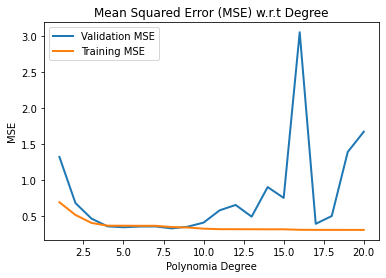

In [ ]:
# Let's try to identify the best degree between 1 and 20, using the training and validation set

degreeLi = list(range(1,21)) # [1, ..., 20]
trainErr = []
validErr = []

# Let's constraint ourselves to the first 50 elements. 
# The limit will be explained later

xTrainSub = xTrain[:50] # Since they are randomly ordered, 
yTrainSub = yTrain[:50] # it is like random sampling 50 elements

xValidationSub = xValidation[:50] # using only first 50 elements
yValidationSub = yValidation[:50] # 

for degree in degreeLi:
  model = np.polyfit(xTrainSub, yTrainSub, degree)
  trainErr.append( compute_error(xTrainSub, yTrainSub, model) )
  validErr.append( compute_error(xValidationSub, yValidationSub, model) )

plt.figure()
plt.title('Mean Squared Error (MSE) w.r.t Degree')
plt.plot(degreeLi, validErr, lw=2, label = 'Validation MSE')
plt.plot(degreeLi, trainErr, lw=2, label = 'Training MSE')

plt.legend()
plt.xlabel('Polynomia Degree')
plt.ylabel('MSE')

plt.show()
# Please ignore the warnings

Some considerations:
* degree<3: Underfitting area. The Training and Validation dataset keep going down when we raise the degree.

* degree>9: Overfitting area. The Training error is reducing (or it doesn't change) while the validation error is getting higher and higher (of course, excluding some isolated points). A good training error and a worseining validation error tells us that the algoritm is overfitting the training set. Summary: increasing gap between valitaion and training error

Please, consider that when you will run the notebook you might obtain different values about the interval 3...9, the presence of spikes, ...
This is due to the underlying random sampling

Now let's investigate the training set optimal size.

In [ ]:
# Let's assume **degree=6** is good, according to the last graph.
# Beware that in our training set we had 50 elements.
# Older plots were drawn upon a 6 elements training set

def showErrorsByTrainDim(
    trainingSizeRange=range(1,600), # Max 600 
    degree=6,
    xTrain=xTrain,
    yTrain=yTrain
  ):
  """Plot training and test errors, for a set of training set size.
  * trainingSizeRange The range of training size to be evaluated
  * degree The polynomial degree"""
  trainErr = []
  validErr = []

  for size in trainingSizeRange:
    xTrainSub = xTrain[:size] # using only first *size* elements. Since they are randomly ordered, it is like random sampling 50 elements
    yTrainSub = yTrain[:size]

    model = np.polyfit(xTrainSub, yTrainSub, degree)
    trainErr.append( compute_error(xTrainSub, yTrainSub, model) )
    validErr.append( compute_error(xValidation, yValidation, model) )

  plt.figure()
  plt.title('Mean Squared Error (MSE) w.r.t Train Size, Degree {deg}'.format(deg=degree))
  plt.plot(trainingSizeRange, validErr, lw=2, label = 'Validation MSE')
  plt.plot(trainingSizeRange, trainErr, lw=2, label = 'Training MSE')

  plt.legend()
  plt.xlabel('Training Set Size')
  plt.ylabel('MSE')

  plt.show()

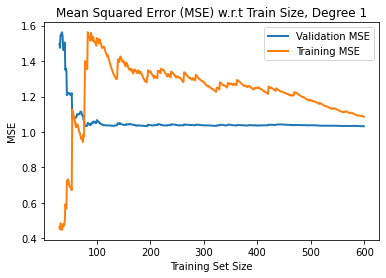

In [ ]:
# Let's inspect degre=1 
showErrorsByTrainDim(
    trainingSizeRange=range(30,600),
    degree=1
  )

Focusing on the right side of the **above** chart. 

After size 100, the Validation Error didn't noticeably improve. 

After size 100, the model achieved its best performace. Trying adding more elements to the training set is useless.


In the right side of the chart, we don't care about the Training Error, it is improving but this is no surprise. 

In the right side the main signal comes from the Validation Error plateau

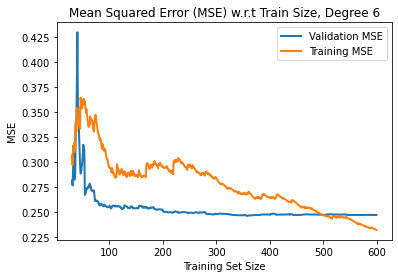

In [ ]:
# Let's inspect the Degree=6 chart
showErrorsByTrainDim(
    trainingSizeRange=range(30,600),
    degree=6,
  )

Focusing on the **above** graph.

Similar considerations as the previous graph.

Fortunately, the Validation Error Plateau (on the right side) is much better. Now is about 0.25, before it was about 1.0.

Using a more powerfull regressor (higher degree) allowed us to improve performances.

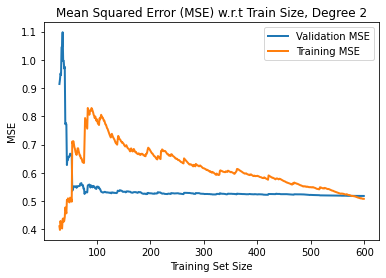

In [ ]:
# Let's try with degree=2
showErrorsByTrainDim(
    trainingSizeRange=range(30,600),
    degree=2
  )

The plateau is better than degree=1 but worst than degree=6.

## Take Home Messages

**Powerful** ML algorithms might underfit or overfit (we will use later a better term than powerful). In the graph below, please consider the "Test Error" as the "Validation Error"

![Model Complexity, Underfitting, Overfitting](https://drive.google.com/uc?export=download&id=12mFgcdJjw-b7Oy57-X6v10upfsn1QCmP)

 
* On the right side, Training and Test Error both decreasing. It is an **underfitting** zone
* On the left side, Test Error increasing and Training Error decreasing, it is an **overfitting** zone


A **not so powerful algoritm** might underfit (i.e., a high bias algorithm), it is very unlikely it can overfit

![High Bias Algorithm](https://drive.google.com/uc?export=download&id=135Dtl1CarrvQ1J6MD_skCQ7K3GU3FKKh)


A not so powerful model will reach its top performances and will unlikely overfit.

Beware: an overfitting model is a complex model, but the viceversa doesn't hold i.e., a complex model may not overfit with large datasets

In the charts above, you can replace **Training Set Size** with **Model complexity** whenever you want

[Image Credits](https://vitalflux.com/overfitting-underfitting-concepts-interview-questions/)


In [ ]:
# This is how the last plot was done
def plotHighBiasRegressor():
  plt.clf()

  # Training Error
  trErrX=[0, 1, 4.5, 7, 10, 20]
  trErrY=[0, 3, 6, 7, 8.5, 8.8]
  plt.plot(trErrX, trErrY, color='blue', label='Training Error')

  # Validartion Error
  valErrx=[0, 1, 4.5, 7, 10, 20]
  valErrY=[18, 15, 12, 11, 9.5, 9.2]
  plt.plot(valErrx, valErrY, color='orange', label='Validation Error')

  plt.gca().axes.set_aspect(1)

  plt.xlabel('Training Set Size')
  plt.ylabel('Error')

  plt.legend()

  # plt.savefig('highBiasCurve.png') Uncomment to save the figure
  plt.show()

#plotHighBiasRegressor()

## Bias and Variance, Visual Introduction

Some consideration

Let's suppose the red target is the house price to hit and the 4 dartboards represent the activities of 4 regressor. 

![Dartboard](https://drive.google.com/uc?export=download&id=135O1n9XbXH1Q96HEVk7p61_vpEMM9-7e)

Introducing the average point and the spread for every cloud of points.

Trying to answer to the previous question:

A. This is ok 

B. The average point is outside the red target (i.e., the inner circle). Here we have a **Bias** issue;

C. The average point is in the red target. Unfortunately, the points are spread on an area larger than the red target. Here we have a **Variance** issue;

D. The average point is outside the red target, the points are spread on a large area arountd. Here we have both a **Bias** and a **Variance** issue;  


## Bias and Variance Considerations

* Bias refers to a systematic error related to a wrong model (frequently, a model too symple to deal with the specific data);

* Variance refers to an error related to data variability (more details later).

Recall: a  generic Machine Learning problem can be described as follow: 
* We have a set of data X and Y
* We want to identify a unknown function $f()$ so that $Y = f(X)$ 
* $f()$ is not known in advance, and we have little or no clue at all about $f()$  
* Typical ML problem: we want to infer $f()$ from the available data



Unfortunately, there are two issues.

1. Data is Noisy i.e.,
\begin{align}
Y=f(X) + \epsilon
\end{align}

2. We want to learn a $f()$ that is general enough to work well on unseen data 

Bias vs Variance Trade-off


* A High **Variance Algorithm** will try to accurately model every point in the training set as . It might better catch the right $f()$, but it is also more prone to overfit. E.g., the degree=6 in the chart below.

* A High Bias algorithm is less influenced by specific  points. Unfortunately, it will likely introduce a bias between the predicted and the actual values. This might prevent properly catching the right $f()$. e.g., the degree=1 in the chart below. 




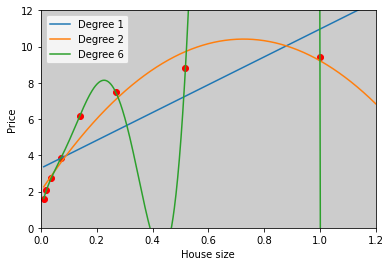

In [ ]:
showPolyomiaFit()

In [ ]:
# Creating the Dartboard

def showDartboard():
  plt.clf()

  fig, axLi = plt.subplots( # if more than one subplot is returned, axLi is an array of elements
      2, 2, # 2 row, 2 columns
      sharex=True, sharey=True,
      figsize=(4*2, 4*2) # the size of the whole picture 
      ) 

  nPunti=30
  pl2coord={
      # np.random.normal(average, stdev, array_size)
      0:(np.random.normal(0.5, 0.025, nPunti), np.random.normal(0.5, 0.025, nPunti), 'A) OK'), 
      1:(np.random.normal(0.6, 0.025, nPunti), np.random.normal(0.6, 0.025, nPunti), "B) What's wrong here? Bias."),
      2:(np.random.normal(0.5, 0.09, nPunti), np.random.normal(0.5, 0.09, nPunti), "C) What's wrong here? Variance."),
      3:(np.random.normal(0.7, 0.09, nPunti), np.random.normal(0.7, 0.09, nPunti), "D) What's wrong here? Bias and Variance"),
      }

  for i, ax in enumerate(axLi.flatten()): # enumerate: iterates over the elements and creates a numerical index
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])
    ax.set_facecolor('0.8') # a float value inside a string refers to a gray-scale in the [0,1] interval


    """ccr = plt.Circle(( 0.5 , 0.5 ), 0.1, color='red', alpha=0.6 ) # , alpha=0.1
    ccw1 = plt.Circle(( 0.5 , 0.5 ), 0.2, color='white' ) # , alpha=0.1
    ccb = plt.Circle(( 0.5 , 0.5 ), 0.3, color='blue', alpha=0.6 ) # , alpha=0.1
    ccw2 = plt.Circle(( 0.5 , 0.5 ), 0.4, color='white' ) # , alpha=0.1
    """
    
    # Disegno i cerchi
    ax.scatter( 0.5 , 0.5 , s = 160**2, color='white', alpha=1 ) # s= marker size in points**2
    ax.scatter( 0.5 , 0.5 , s = 120**2, color='blue', alpha=0.6 ) # s= marker size in points**2
    ax.scatter( 0.5 , 0.5 , s = 80**2, color='white', alpha=1 ) # s= marker size in points**2
    ax.scatter( 0.5 , 0.5 , s = 40**2, color='red', alpha=0.6 ) # s= marker size in points**2
    
    """
    ax.set_aspect( 1 ) 
    ax.add_artist( ccw2 ) 
    ax.add_artist( ccb ) 
    ax.add_artist( ccw1 ) 
    ax.add_artist( ccr ) 
    """
    
    
    
    x,y, title = pl2coord[i]
    
    ax.set_title(title)
    
    ax.scatter( # scatter plot
          x,y,
          #x, y, # coordinate vectors
          marker='X', 
          #c='k', #color
          color='black',
          #color='black', # color
          #s=50
      ) 
  #plt.savefig('dartboard.png')
  plt.show()  

#showDartboard()    
# Please, evaluate the shooter result on the dartboard

Why **High Variance** algorithm are called this way?

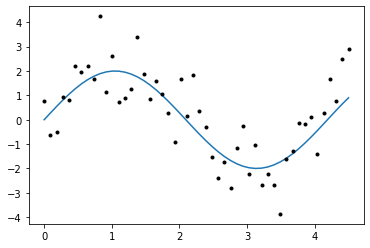

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

def getDataset(size):
    '''
    fun() is a function to be guessed by a regressor
    # Size is the dimension of the returned x and y vectors
    '''
    x = np.linspace(0, 4.5, size)
    y = 2 * np.sin(x * 1.5)
    return (x,y)

def getNoisyDataset(size):
    '''
    Returns a noisy datasset with 'size' instances.
    This dataset represents a typical input for a ML algorithm.
    '''
    x = np.linspace(0, 4.5, size)
    y = 2 * np.sin(x * 1.5) + np.random.randn(x.size)
    return (x,y)
    

# Plotting the real function (continuous line) and the noisy dataset (the dots)
f_x, f_y = getDataset(50) # obtaining a dataset of 50 elements
plt.plot(f_x, f_y)
x, y = getNoisyDataset(50)
plt.plot(x, y, 'k.')
plt.show()

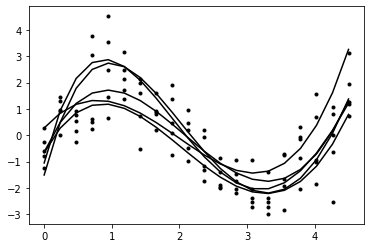

In [ ]:
# Showing how a high Variance Algorithm migh be affected by Noise

# We will generate several samples of Noisy data, fit a model for each, and draw all models


def plotDatasetAndFittedCurve(degree=4):

  plt.clf()

  n_samples = 20
  n_models = 5
  #avg_y = np.zeros(n_samples) # counter for the average model
  for i in range(n_models):
      (x,y) = getNoisyDataset(n_samples)
      #model = fit_polynomial(x, y, degree)
      model = np.polyfit(x, y, degree)
      p_y = np.polyval(model, x)
      #p_y = apply_polynomial(model, x)
      #avg_y = avg_y + p_y
      plt.plot(x, p_y, 'k-')
      # Plotting the points
      plt.plot(x, y, 'k.')
  # Computing and plotting the all-models-average-value
  #avg_y = avg_y / n_models
  #plt.plot(x, avg_y, 'b--')


plotDatasetAndFittedCurve(degree=4)

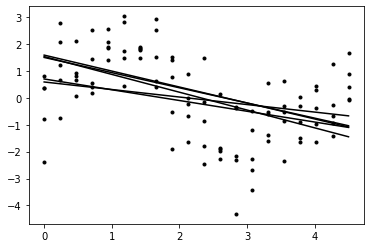

In [ ]:
# a 1 degree polynomia has little variance
plotDatasetAndFittedCurve(degree=1)

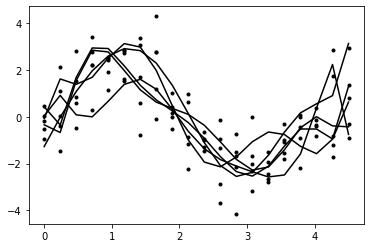

In [ ]:
# a 8 degree polynomia has higher variance
plotDatasetAndFittedCurve(degree=8)

## Bias and Variance are Decompositions of the MSE

Let $\hat\theta_i$ be an estimator of $\theta$ computed over a dataset $D_i \subset D$. 

E.g., $D_i$ might be 
* a training set to fit the  house-price-estimator. 
* the x coordinate of an arrow hitting the dartboard

A subset $D_i$ is extracted several times and the estimator $\hat\theta_i$ is computed upon $D_i$ (e.g., $D_i$ might be a training set). 

For simplicity, from now on  $\hat\theta_i$ will be $\hat\theta$.

The MSE of an estimator $\hat\theta$ for $\theta$ is 

$mse(\hat\theta)=E(\hat\theta - \theta)^2$  

i.e., the MSE can be split into two components: 
* the first one related to a systematic error (bias) introduced by a high bias estimator
* the second one related to data variability (variance)

This important relationship hold:

$mse(\hat\theta)=bias(\hat\theta)^2+var(\hat\theta)$

Here follow a demonstration. It's a complimentary part (not required during examination)


Recall: 

* $bias(\hat\theta)=E(\hat\theta) - \theta$

* $\mu = E(\hat\theta)$ i.e., we can write $\mu$ instead of $E(\hat\theta)$

* $bias(\hat\theta)^2 = (\mu - \theta)^2$  (important, $\mu$ and $\theta$ are fixed values)

* $var(\hat\theta)=E(\hat\theta-\mu)^2$


Prop: $mse(\hat\theta)=bias(\hat\theta)^2+var(\hat\theta)$

Proof: 

$mse(\hat\theta)=E(\hat\theta-\theta)^2 = $

$= E(\hat\theta -\mu +\mu -\theta)^2 = $

$= E((\hat\theta -\mu) +(\mu -\theta))^2 = $

$= E((\hat\theta -\mu)^2 +2(\hat\theta -\mu)(\mu -\theta) + (\mu -\theta)^2 ) = $

$= E(\hat\theta -\mu)^2 + E(2(\hat\theta -\mu)(\mu -\theta)) + E(\mu -\theta)^2  =
$

by definition $\mu = E(\hat\theta)$,  then $E(\hat\theta - \mu) = 0$

$= E(\hat\theta -\mu)^2 + 0 + (\mu -\theta)^2  =$

$= E(\hat\theta -\mu)^2 + (\mu -\theta)^2  =$



$= var(\hat\theta) + bias(\hat\theta)^2 $



The bias–variance decomposition was originally formulated for least-squares regression. For the case of classification (i.e., 0-1 loss also called misclassification rate), it is possible to find a similar decomposition. [Domingos, P. (2000). A unified bias-variance decomposition. International Conference on Machine Learning.](https://homes.cs.washington.edu/~pedrod/bvd.pdf)




## Some (Practitioner Oriented) Suggestions

Bias vs Variance Diagnostic

Starting problem: error unaceptably high. You want to figure out how much the problem is related to variance and how much is related to bias. 

A useful diagnostic is plotting the training and test  errors w.r.t. th e training set dimensions. 

High Variance Algorithm

![Model Complexity, Underfitting, Overfitting](https://drive.google.com/uc?export=download&id=12mFgcdJjw-b7Oy57-X6v10upfsn1QCmP)


High Bias Algorithm

![High Bias Algorithm](https://drive.google.com/uc?export=download&id=135Dtl1CarrvQ1J6MD_skCQ7K3GU3FKKh)


Issues and Fixes

 * Try getting more training examples (fixes high variance). More data will teach the algorithm how to generalize better

* Try a smaller set of features (fixes high variance). Reducing features help reducing model complexity and this might decrease variance

* Try a larger set of (meaningful) features (fixes high bias). This makes the model more complex and a complex model might better deal the dataset complexity.


Credits: 
* [Fabgoos Notebook](https://notebook.community/crowd-course/datascience/Learning%20curves%20and%20bias-variance%20tradeoff)

* [Andrew Ng’s machine learning video lectures](http://www.ml-class.org)
